In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic

# 여기서 부터는 구글 COLAB구동시 필요
from google.colab import files     #colab 돌릴때
uploaded = files.upload()          #colab 돌릴때




Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

  


Found GPU at: /device:GPU:0
Wed Jun  1 02:35:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    375MiB / 16280MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.0033621409999967
GPU (s):
0.05005748000002086
GPU speedup over CPU: 40x


In [ ]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [ ]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [ ]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [ ]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [ ]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [ ]:
white_quality = wine.loc[wine.type==1, 'quality']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


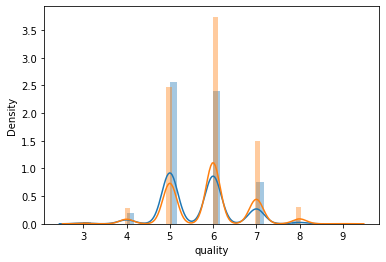

In [ ]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [ ]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


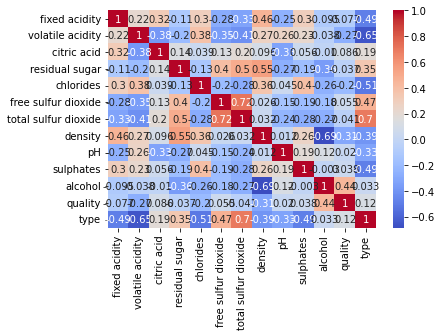

In [ ]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [ ]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [ ]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [ ]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [ ]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [ ]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,0
501,10.4,0.440,0.73,6.55,0.074,38.0,76.0,0.99900,3.17,0.85,12.0,7,0
1034,8.9,0.745,0.18,2.50,0.077,15.0,48.0,0.99739,3.20,0.47,9.7,6,0
942,10.1,0.430,0.40,2.60,0.092,13.0,52.0,0.99834,3.22,0.64,10.0,7,0
1295,6.6,0.630,0.00,4.30,0.093,51.0,77.5,0.99558,3.20,0.45,9.5,5,0


In [ ]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5895,6.9,0.22,0.32,5.8,0.041,20.0,119.0,0.99296,3.17,0.55,11.2,6,1
4573,7.5,0.19,0.40,7.1,0.056,50.0,110.0,0.99540,3.06,0.52,9.9,6,1
2406,6.2,0.29,0.26,13.1,0.046,55.0,204.0,0.99745,3.16,0.41,9.6,6,1
3921,6.1,0.41,0.04,1.3,0.036,23.0,121.0,0.99228,3.24,0.61,9.9,6,1
3654,7.3,0.29,0.29,4.6,0.029,27.0,155.0,0.99310,3.07,0.26,10.6,6,1


In [ ]:
wine_sample = pd.concat([red_sample, white_sample])

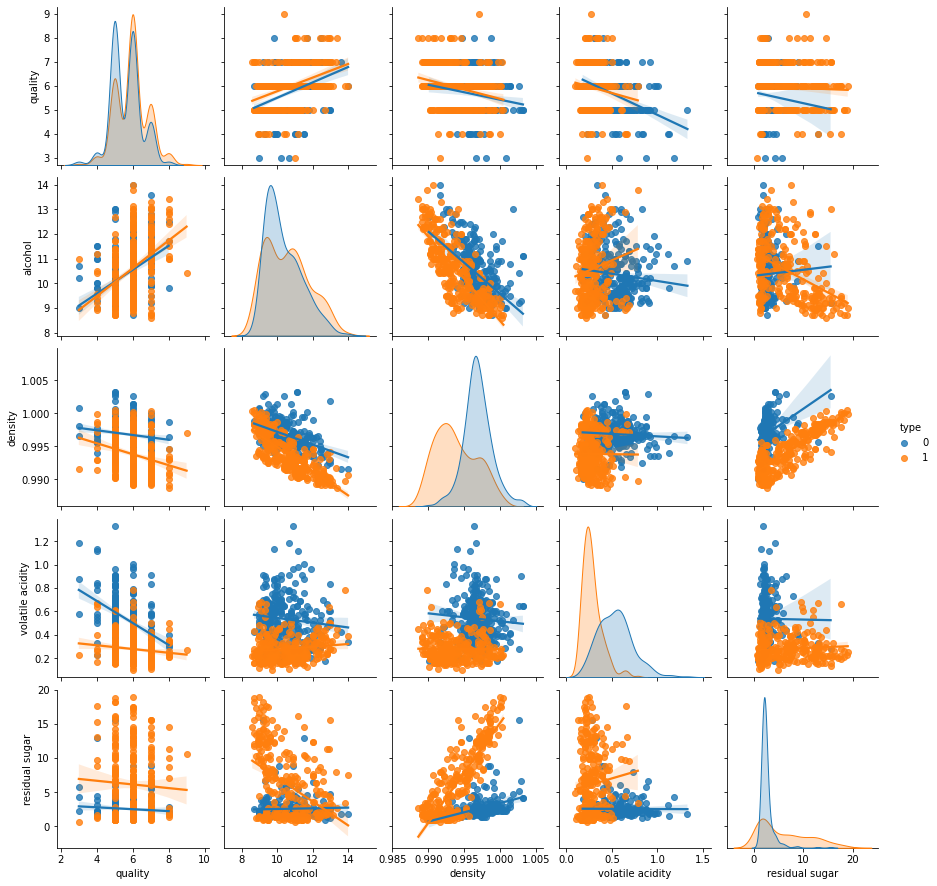

In [ ]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [ ]:
wine.columns = wine.columns.str.replace(' ','_')

In [ ]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [ ]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']            #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [ ]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [ ]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity']

In [ ]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity', 'chlorides']

In [ ]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [ ]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [ ]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [ ]:
X = wine_standard[features]
# X_B = wine_standard[features_B]
# X_C = wine_standard[features_C]
# X_D = wine_standard[features_D]
# X_E = wine_standard[features_E]
# X_F = wine_standard[features_F]
# X_G = wine_standard[features_G]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [ ]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)

# X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, wine.quality, train_size=0.8, random_state=31)
# X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, wine.quality, train_size=0.8, random_state=31)
# X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D, wine.quality, train_size=0.8, random_state=31)
# X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, wine.quality, train_size=0.8, random_state=31)
# X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(X_F, wine.quality, train_size=0.8, random_state=31)
# X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(X_G, wine.quality, train_size=0.8, random_state=31)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [ ]:
# 모델정의


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
# model_H = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction = model.predict(X_test)

In [ ]:
# prediction

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
# metrics.mean_absolute_error(y_test, prediction)

In [ ]:
# metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = 20, 
#                                   max_features =0.7,
#                                   random_state=31)

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 15, 
#                                    max_features =0.7,
#                                    random_state=51)

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 10, 
#                                    max_features =0.7,
#                                    random_state=51)

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 5, 
#                                    max_features =0.7,
#                                    random_state=51)

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50).mean()

# 하이퍼 파라메터 시작...


In [ ]:
# from tqdm import tqdm

# hyper_result =[]

# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# n_estimators = [500]#, 400, 300, 600, 700, 800, 900, 100]    # 100~900 , 구동시간을 예측해놓기 위해 중앙값을 가장 먼저 진행하여 종료 예상시간을 파악함

# for c in tqdm(n_estimators):
#     for i in tqdm(range(60)):
#         a = np.random.randint(40,90)
#         b = np.random.uniform(0.3,1.0)
        
#         model = RandomForestRegressor(n_estimators = c, 
#                                     max_depth = a, 
#                                     max_features =b,
#                                     min_samples_split=5,
#                                     min_samples_leaf=1,
#                                     random_state=31)

#         score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

#         hyper_result.append({'점수' : score,
#                             'n_estimators' : c,
#                             'MAX_depth': a,
#                             'MAX_features': b})
                

#         print("현재 스코어는 {0:.5f}".format(score))


In [ ]:
# pd.set_option('display.max_row',20)
# pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

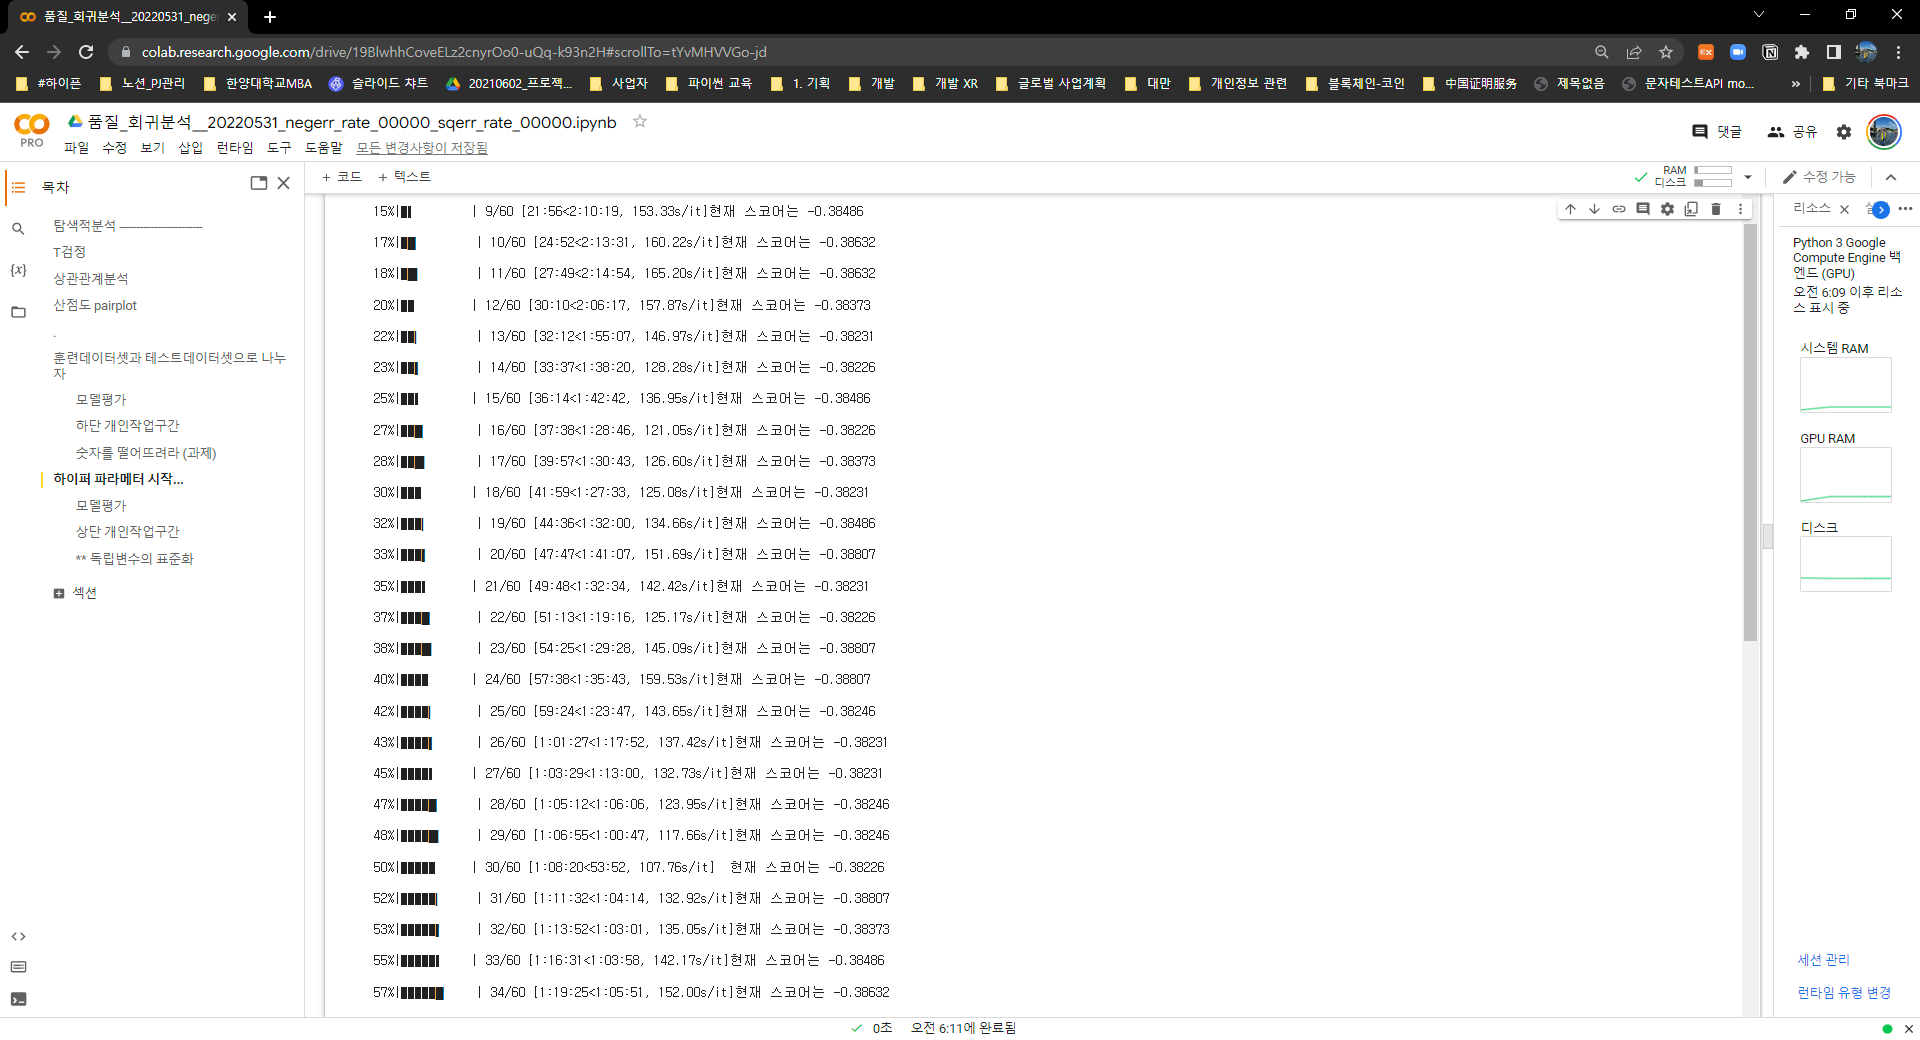

In [ ]:
# from tqdm import tqdm

# hyper_result =[]

# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# n_estimators = [400]#, 600, 700, 800, 900, 100, 300]    # 100~900 , 구동시간을 예측해놓기 위해 중앙값을 가장 먼저 진행하여 종료 예상시간을 파악함

# for c in tqdm(n_estimators):
#     for i in tqdm(range(60)):
#         a = np.random.randint(40,90)
#         b = np.random.uniform(0.3,1.0)
        
#         model = RandomForestRegressor(n_estimators = c, 
#                                     max_depth = a, 
#                                     max_features =b,
#                                     min_samples_split=5,
#                                     min_samples_leaf=1,
#                                     random_state=31)

#         score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

#         hyper_result.append({'점수' : score,
#                             'n_estimators' : c,
#                             'MAX_depth': a,
#                             'MAX_features': b})
                

#         print("현재 스코어는 {0:.5f}".format(score))


In [ ]:
# pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

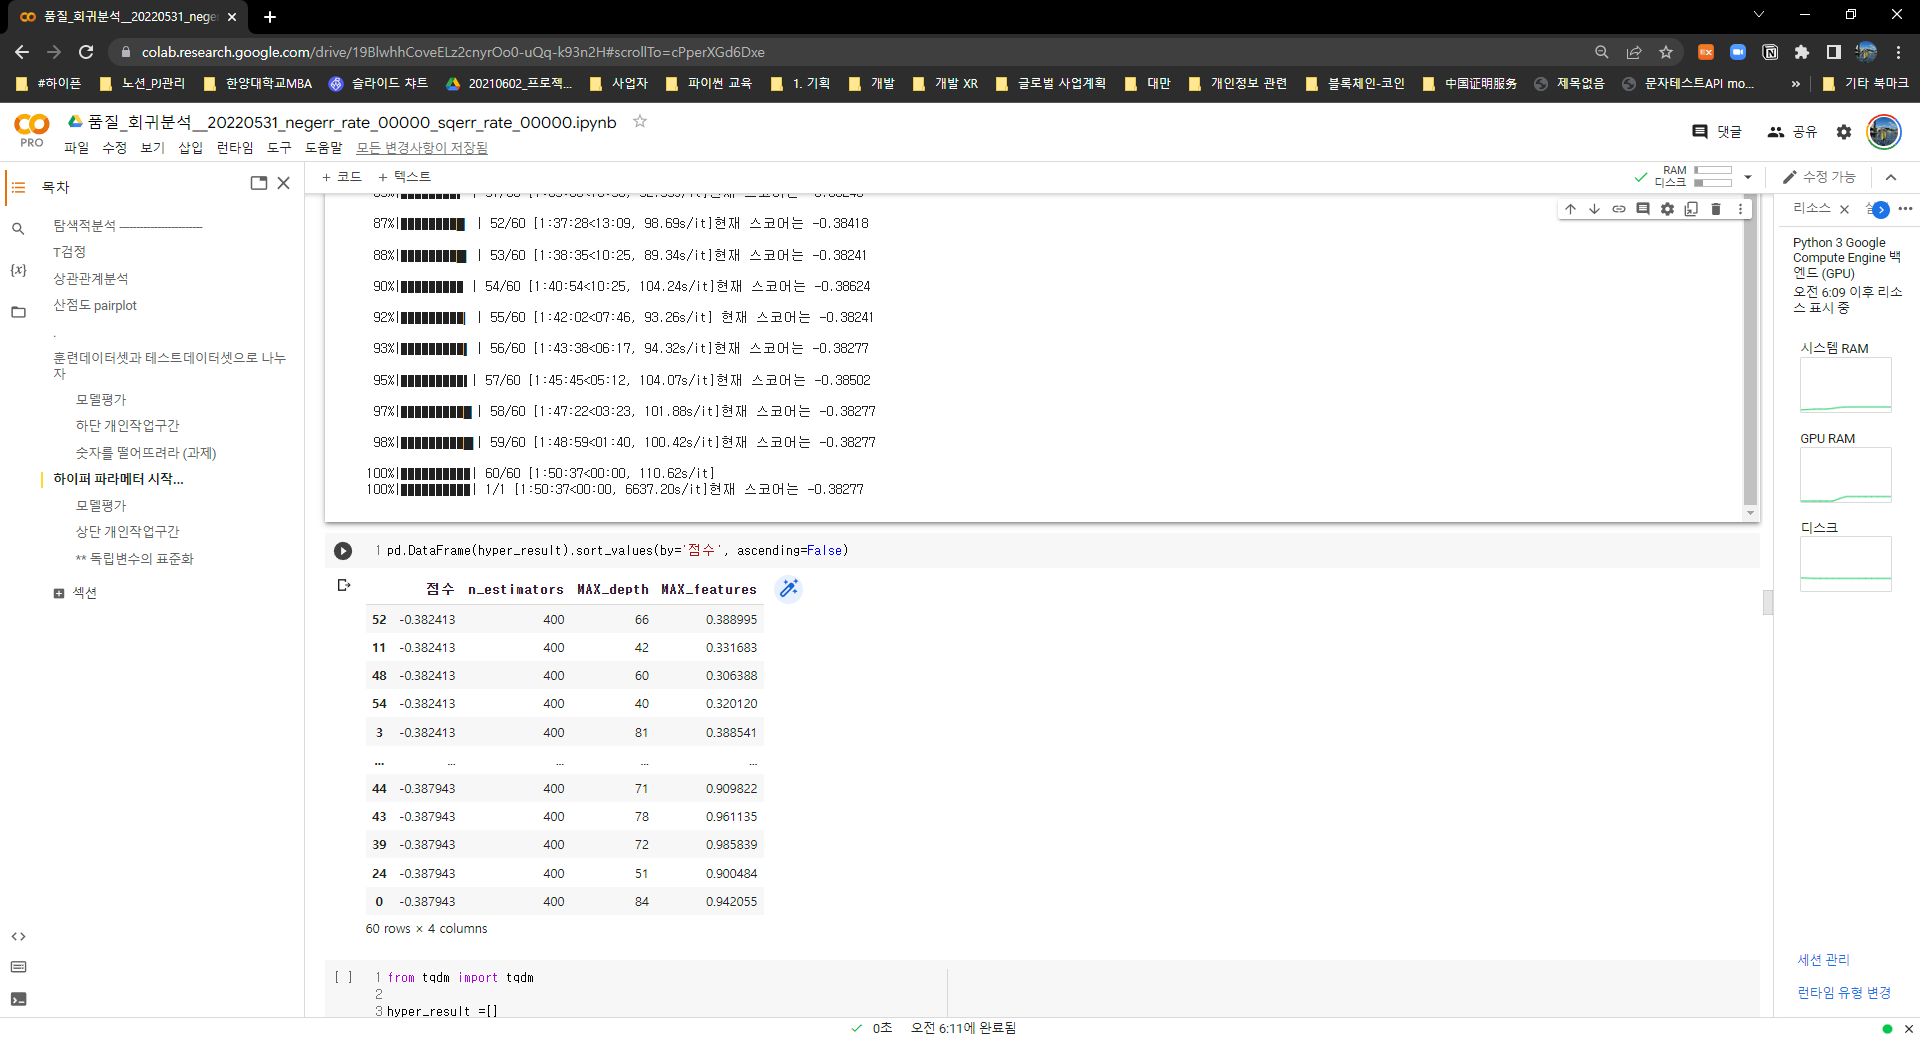

In [ ]:
# from tqdm import tqdm

# hyper_result =[]

# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# n_estimators = [600]#, 700, 800, 900, 100, 300]    # 100~900 , 구동시간을 예측해놓기 위해 중앙값을 가장 먼저 진행하여 종료 예상시간을 파악함

# for c in tqdm(n_estimators):
#     for i in tqdm(range(60)):
#         a = np.random.randint(40,90)
#         b = np.random.uniform(0.3,1.0)
        
#         model = RandomForestRegressor(n_estimators = c, 
#                                     max_depth = a, 
#                                     max_features =b,
#                                     min_samples_split=5,
#                                     min_samples_leaf=1,
#                                     random_state=31)

#         score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

#         hyper_result.append({'점수' : score,
#                             'n_estimators' : c,
#                             'MAX_depth': a,
#                             'MAX_features': b})
                

#         print("현재 스코어는 {0:.5f}".format(score))


In [ ]:
# pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

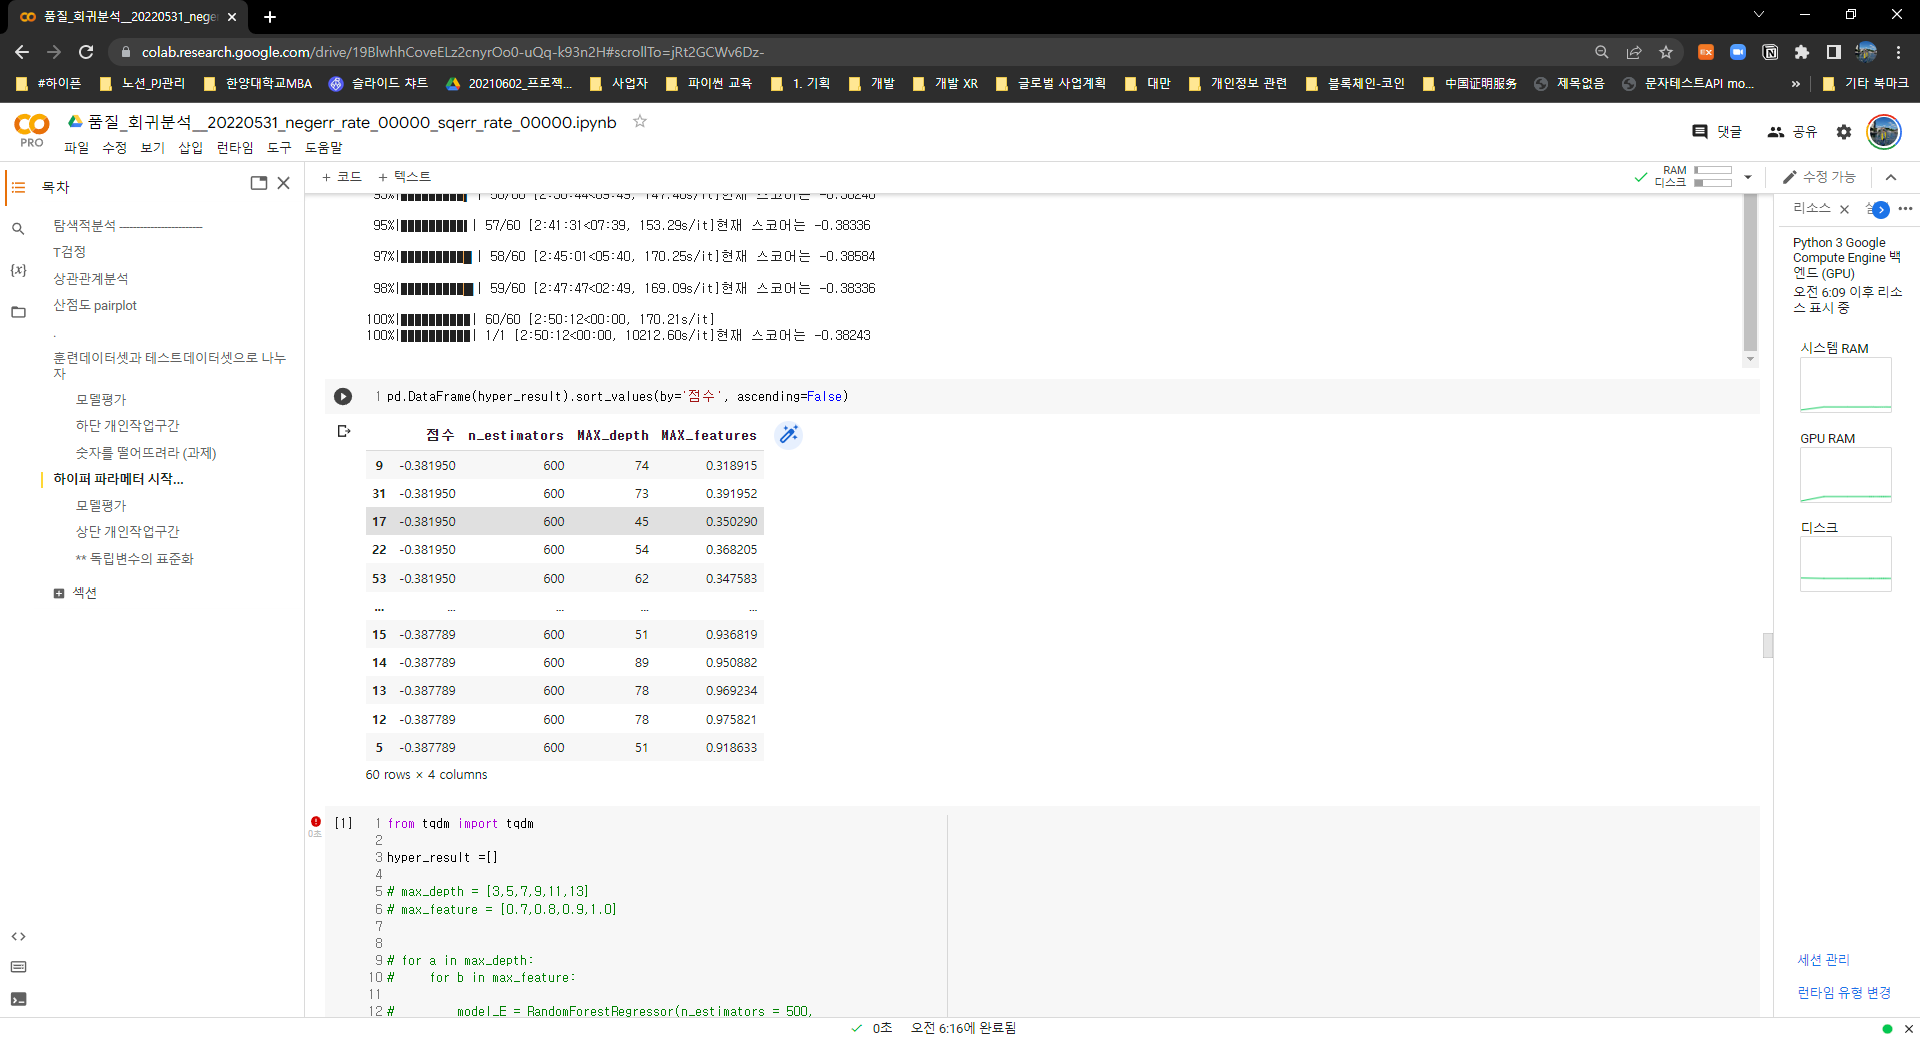

In [ ]:
from tqdm import tqdm

hyper_result =[]

n_estimators = [1000]    # 100~1000 해봄 , 클스룩 neg err은 미세하지만 낮아짐, 그렇다고 squ err이 낮아지는 것을 보장하지 않음

for c in tqdm(n_estimators):
    for i in tqdm(range(80)):
        a = np.random.randint(40,80)
        b = np.random.uniform(0.2,0.9)
        
        model = RandomForestRegressor(n_estimators = c, 
                                    max_depth = a, 
                                    max_features =b,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    random_state=31,
                                    n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

        hyper_result.append({'점수' : score,
                            'n_estimators' : c,
                            'MAX_depth': a,
                            'MAX_features': b,
                             'cv' : d}
                            )
                

        print("현재 스코어는 {0:.5f}".format(score))


  1%|▏         | 1/80 [01:18<1:43:55, 78.93s/it]

현재 스코어는 -0.37163



  2%|▎         | 2/80 [02:36<1:41:27, 78.05s/it]

현재 스코어는 -0.37163



  4%|▍         | 3/80 [04:02<1:45:04, 81.87s/it]

현재 스코어는 -0.37232



  5%|▌         | 4/80 [06:08<2:05:26, 99.03s/it]

현재 스코어는 -0.37631



  6%|▋         | 5/80 [08:26<2:21:36, 113.28s/it]

현재 스코어는 -0.37798



  8%|▊         | 6/80 [10:20<2:19:51, 113.40s/it]

현재 스코어는 -0.37446



  9%|▉         | 7/80 [12:39<2:28:10, 121.79s/it]

현재 스코어는 -0.37798



 10%|█         | 8/80 [14:33<2:23:02, 119.20s/it]

현재 스코어는 -0.37446



 11%|█▏        | 9/80 [16:01<2:09:33, 109.48s/it]

현재 스코어는 -0.37232



 12%|█▎        | 10/80 [17:40<2:04:03, 106.34s/it]

현재 스코어는 -0.37387



 14%|█▍        | 11/80 [18:56<1:51:45, 97.18s/it] 

현재 스코어는 -0.37163



 15%|█▌        | 12/80 [20:13<1:42:53, 90.78s/it]

현재 스코어는 -0.37163



 16%|█▋        | 13/80 [21:41<1:40:39, 90.14s/it]

현재 스코어는 -0.37232



 18%|█▊        | 14/80 [23:48<1:51:28, 101.33s/it]

현재 스코어는 -0.37631



 19%|█▉        | 15/80 [25:17<1:45:38, 97.51s/it] 

현재 스코어는 -0.37232



 20%|██        | 16/80 [26:46<1:41:11, 94.86s/it]

현재 스코어는 -0.37232



 21%|██▏       | 17/80 [28:41<1:45:56, 100.89s/it]

현재 스코어는 -0.37446



 22%|██▎       | 18/80 [31:01<1:56:30, 112.74s/it]

현재 스코어는 -0.37798



 24%|██▍       | 19/80 [33:35<2:07:14, 125.15s/it]

현재 스코어는 -0.37974



 25%|██▌       | 20/80 [35:03<1:54:02, 114.04s/it]

현재 스코어는 -0.37232



 26%|██▋       | 21/80 [36:59<1:52:34, 114.48s/it]

현재 스코어는 -0.37446



 28%|██▊       | 22/80 [39:33<2:02:14, 126.46s/it]

현재 스코어는 -0.37974



 29%|██▉       | 23/80 [40:50<1:46:01, 111.60s/it]

현재 스코어는 -0.37163



 30%|███       | 24/80 [42:57<1:48:35, 116.34s/it]

현재 스코어는 -0.37631



 31%|███▏      | 25/80 [45:04<1:49:21, 119.30s/it]

현재 스코어는 -0.37631



 32%|███▎      | 26/80 [47:37<1:56:31, 129.47s/it]

현재 스코어는 -0.37974



 34%|███▍      | 27/80 [50:08<2:00:08, 136.00s/it]

현재 스코어는 -0.37974



 35%|███▌      | 28/80 [52:16<1:55:44, 133.55s/it]

현재 스코어는 -0.37631



 36%|███▋      | 29/80 [53:33<1:39:01, 116.51s/it]

현재 스코어는 -0.37163



 38%|███▊      | 30/80 [55:14<1:33:22, 112.06s/it]

현재 스코어는 -0.37387



 39%|███▉      | 31/80 [57:35<1:38:25, 120.51s/it]

현재 스코어는 -0.37798



 40%|████      | 32/80 [59:17<1:32:06, 115.14s/it]

현재 스코어는 -0.37387



 41%|████▏     | 33/80 [1:00:59<1:26:58, 111.04s/it]

현재 스코어는 -0.37387



 42%|████▎     | 34/80 [1:03:05<1:28:43, 115.73s/it]

현재 스코어는 -0.37631



 44%|████▍     | 35/80 [1:05:25<1:32:13, 122.98s/it]

현재 스코어는 -0.37798



 45%|████▌     | 36/80 [1:07:15<1:27:17, 119.03s/it]

현재 스코어는 -0.37446



 46%|████▋     | 37/80 [1:09:31<1:28:53, 124.03s/it]

현재 스코어는 -0.37798



 48%|████▊     | 38/80 [1:10:44<1:16:09, 108.81s/it]

현재 스코어는 -0.37163



 49%|████▉     | 39/80 [1:12:10<1:09:35, 101.83s/it]

현재 스코어는 -0.37232



 50%|█████     | 40/80 [1:14:26<1:14:44, 112.10s/it]

현재 스코어는 -0.37798



 51%|█████▏    | 41/80 [1:16:03<1:10:03, 107.79s/it]

현재 스코어는 -0.37387



 52%|█████▎    | 42/80 [1:18:07<1:11:11, 112.41s/it]

현재 스코어는 -0.37631



 54%|█████▍    | 43/80 [1:20:08<1:11:04, 115.25s/it]

현재 스코어는 -0.37631



 55%|█████▌    | 44/80 [1:21:22<1:01:34, 102.62s/it]

현재 스코어는 -0.37163



 56%|█████▋    | 45/80 [1:23:50<1:07:50, 116.31s/it]

현재 스코어는 -0.37974



 57%|█████▊    | 46/80 [1:25:03<58:38, 103.49s/it]  

현재 스코어는 -0.37163



 59%|█████▉    | 47/80 [1:27:31<1:04:15, 116.84s/it]

현재 스코어는 -0.37974



 60%|██████    | 48/80 [1:29:59<1:07:09, 125.92s/it]

현재 스코어는 -0.37974



 61%|██████▏   | 49/80 [1:31:13<57:04, 110.47s/it]  

현재 스코어는 -0.37163



 62%|██████▎   | 50/80 [1:33:04<55:21, 110.72s/it]

현재 스코어는 -0.37446



 64%|██████▍   | 51/80 [1:35:11<55:51, 115.55s/it]

현재 스코어는 -0.37446



 65%|██████▌   | 52/80 [1:37:06<53:52, 115.45s/it]

현재 스코어는 -0.37446



 66%|██████▋   | 53/80 [1:39:22<54:43, 121.62s/it]

현재 스코어는 -0.37798



 68%|██████▊   | 54/80 [1:40:37<46:34, 107.46s/it]

현재 스코어는 -0.37163



 69%|██████▉   | 55/80 [1:41:50<40:29, 97.19s/it] 

현재 스코어는 -0.37162



 70%|███████   | 56/80 [1:43:15<37:26, 93.62s/it]

현재 스코어는 -0.37232



 71%|███████▏  | 57/80 [1:45:42<41:59, 109.53s/it]

현재 스코어는 -0.37974



 72%|███████▎  | 58/80 [1:48:08<44:08, 120.41s/it]

현재 스코어는 -0.37974



 74%|███████▍  | 59/80 [1:49:20<37:06, 106.03s/it]

현재 스코어는 -0.37163



 75%|███████▌  | 60/80 [1:50:45<33:14, 99.72s/it] 

현재 스코어는 -0.37232



 76%|███████▋  | 61/80 [1:52:46<33:37, 106.20s/it]

현재 스코어는 -0.37631



 78%|███████▊  | 62/80 [1:55:13<35:28, 118.24s/it]

현재 스코어는 -0.37974



 79%|███████▉  | 63/80 [1:57:38<35:49, 126.44s/it]

현재 스코어는 -0.37974



 80%|████████  | 64/80 [1:58:51<29:25, 110.32s/it]

현재 스코어는 -0.37163



 81%|████████▏ | 65/80 [2:00:16<25:40, 102.70s/it]

현재 스코어는 -0.37232



 82%|████████▎ | 66/80 [2:02:29<26:06, 111.92s/it]

현재 스코어는 -0.37798



 84%|████████▍ | 67/80 [2:03:54<22:30, 103.85s/it]

현재 스코어는 -0.37232



 85%|████████▌ | 68/80 [2:05:19<19:34, 97.91s/it] 

현재 스코어는 -0.37232



 86%|████████▋ | 69/80 [2:06:31<16:33, 90.32s/it]

현재 스코어는 -0.37163



 88%|████████▊ | 70/80 [2:07:44<14:11, 85.12s/it]

현재 스코어는 -0.37163



 89%|████████▉ | 71/80 [2:09:21<13:19, 88.79s/it]

현재 스코어는 -0.37387



 90%|█████████ | 72/80 [2:11:35<13:36, 102.10s/it]

현재 스코어는 -0.37798



 91%|█████████▏| 73/80 [2:13:23<12:07, 103.97s/it]

현재 스코어는 -0.37446



 92%|█████████▎| 74/80 [2:14:48<09:49, 98.22s/it] 

현재 스코어는 -0.37232



 94%|█████████▍| 75/80 [2:17:13<09:21, 112.36s/it]

현재 스코어는 -0.37974



 95%|█████████▌| 76/80 [2:18:38<06:56, 104.08s/it]

현재 스코어는 -0.37232



 96%|█████████▋| 77/80 [2:21:03<05:49, 116.49s/it]

현재 스코어는 -0.37974



 98%|█████████▊| 78/80 [2:22:51<03:47, 113.95s/it]

현재 스코어는 -0.37446



 99%|█████████▉| 79/80 [2:24:40<01:52, 112.48s/it]

현재 스코어는 -0.37446



100%|██████████| 1/1 [2:26:41<00:00, 8801.67s/it]

현재 스코어는 -0.37631


In [ ]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 10)

pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 


pandas version:  1.3.5


,점수,n_estimators,MAX_depth,MAX_features,cv
54,-0.371617,1000,40,0.237468,20
0,-0.371626,1000,74,0.258031,20
63,-0.371626,1000,46,0.248297,20
1,-0.371626,1000,59,0.287443,20
28,-0.371626,1000,53,0.258743,20
...,...,...,...,...,...
47,-0.379737,1000,75,0.894334,20
18,-0.379737,1000,41,0.879133,20
25,-0.379737,1000,69,0.800611,20
57,-0.379737,1000,43,0.874308,20


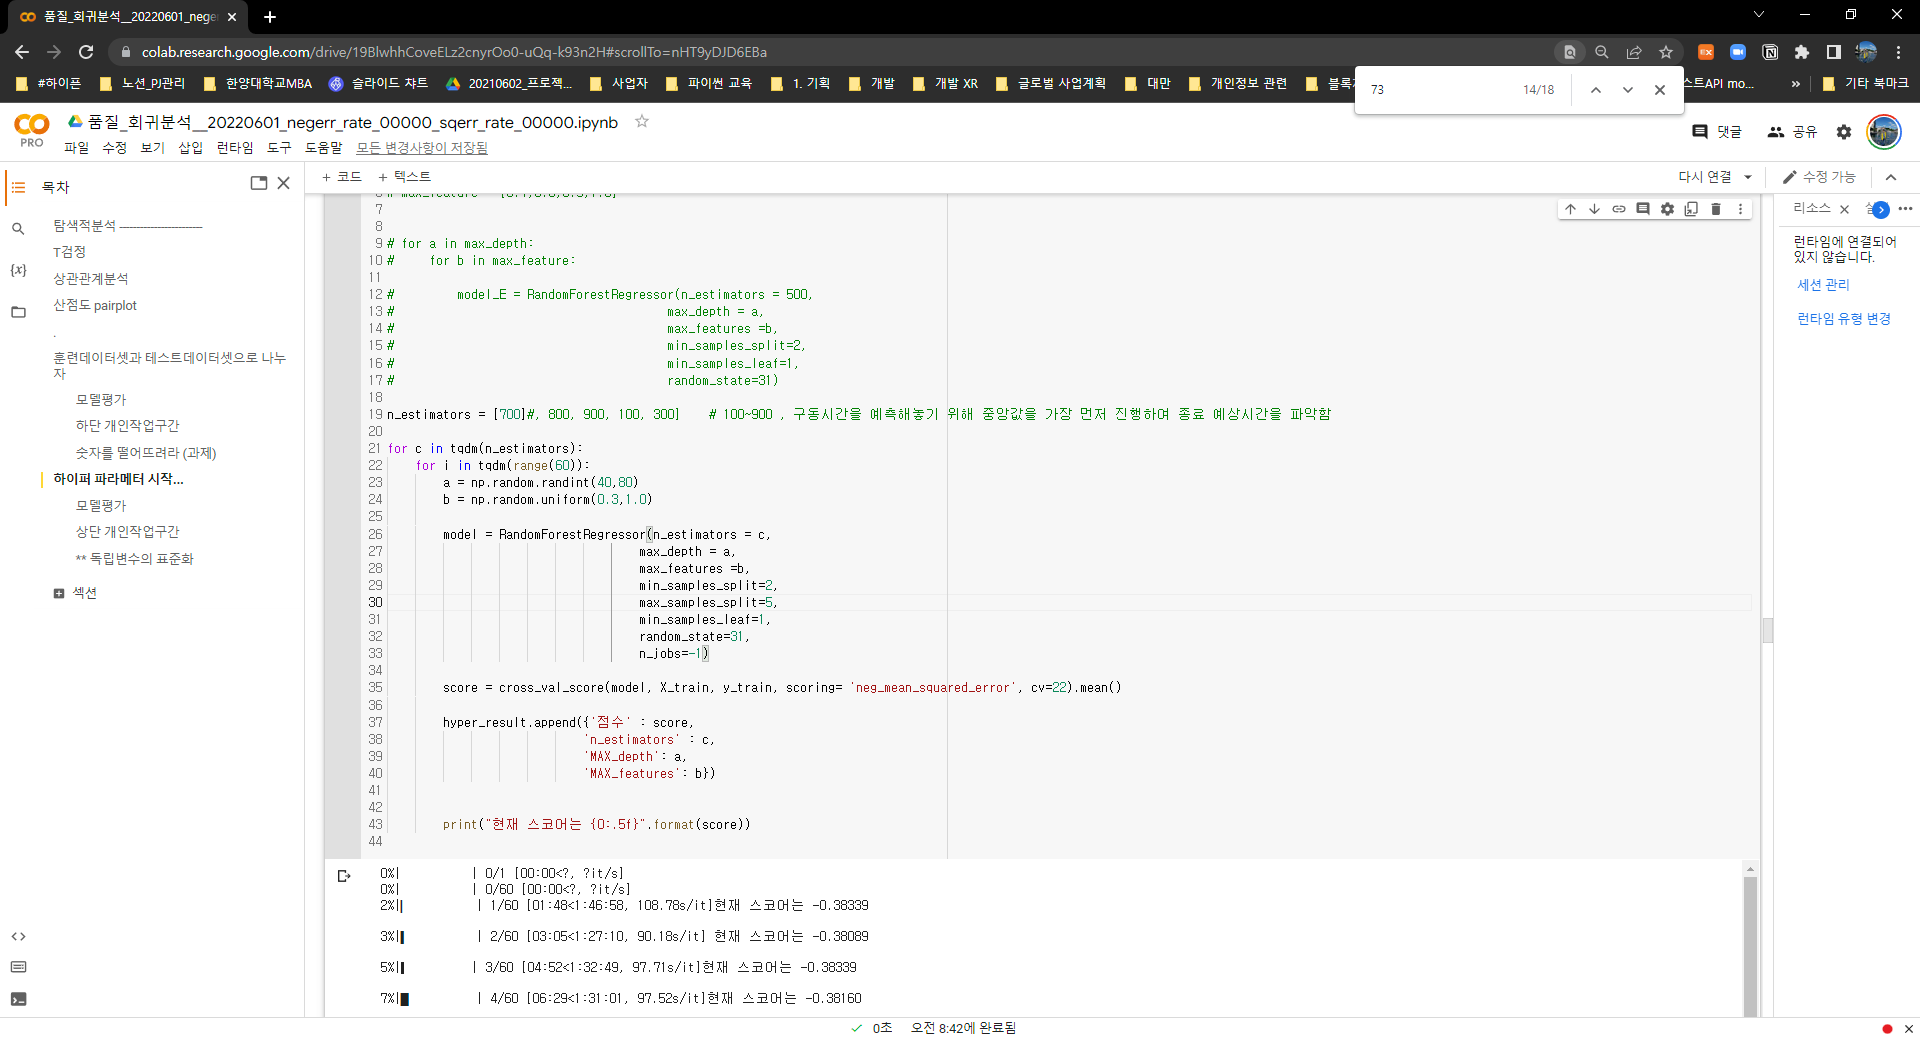


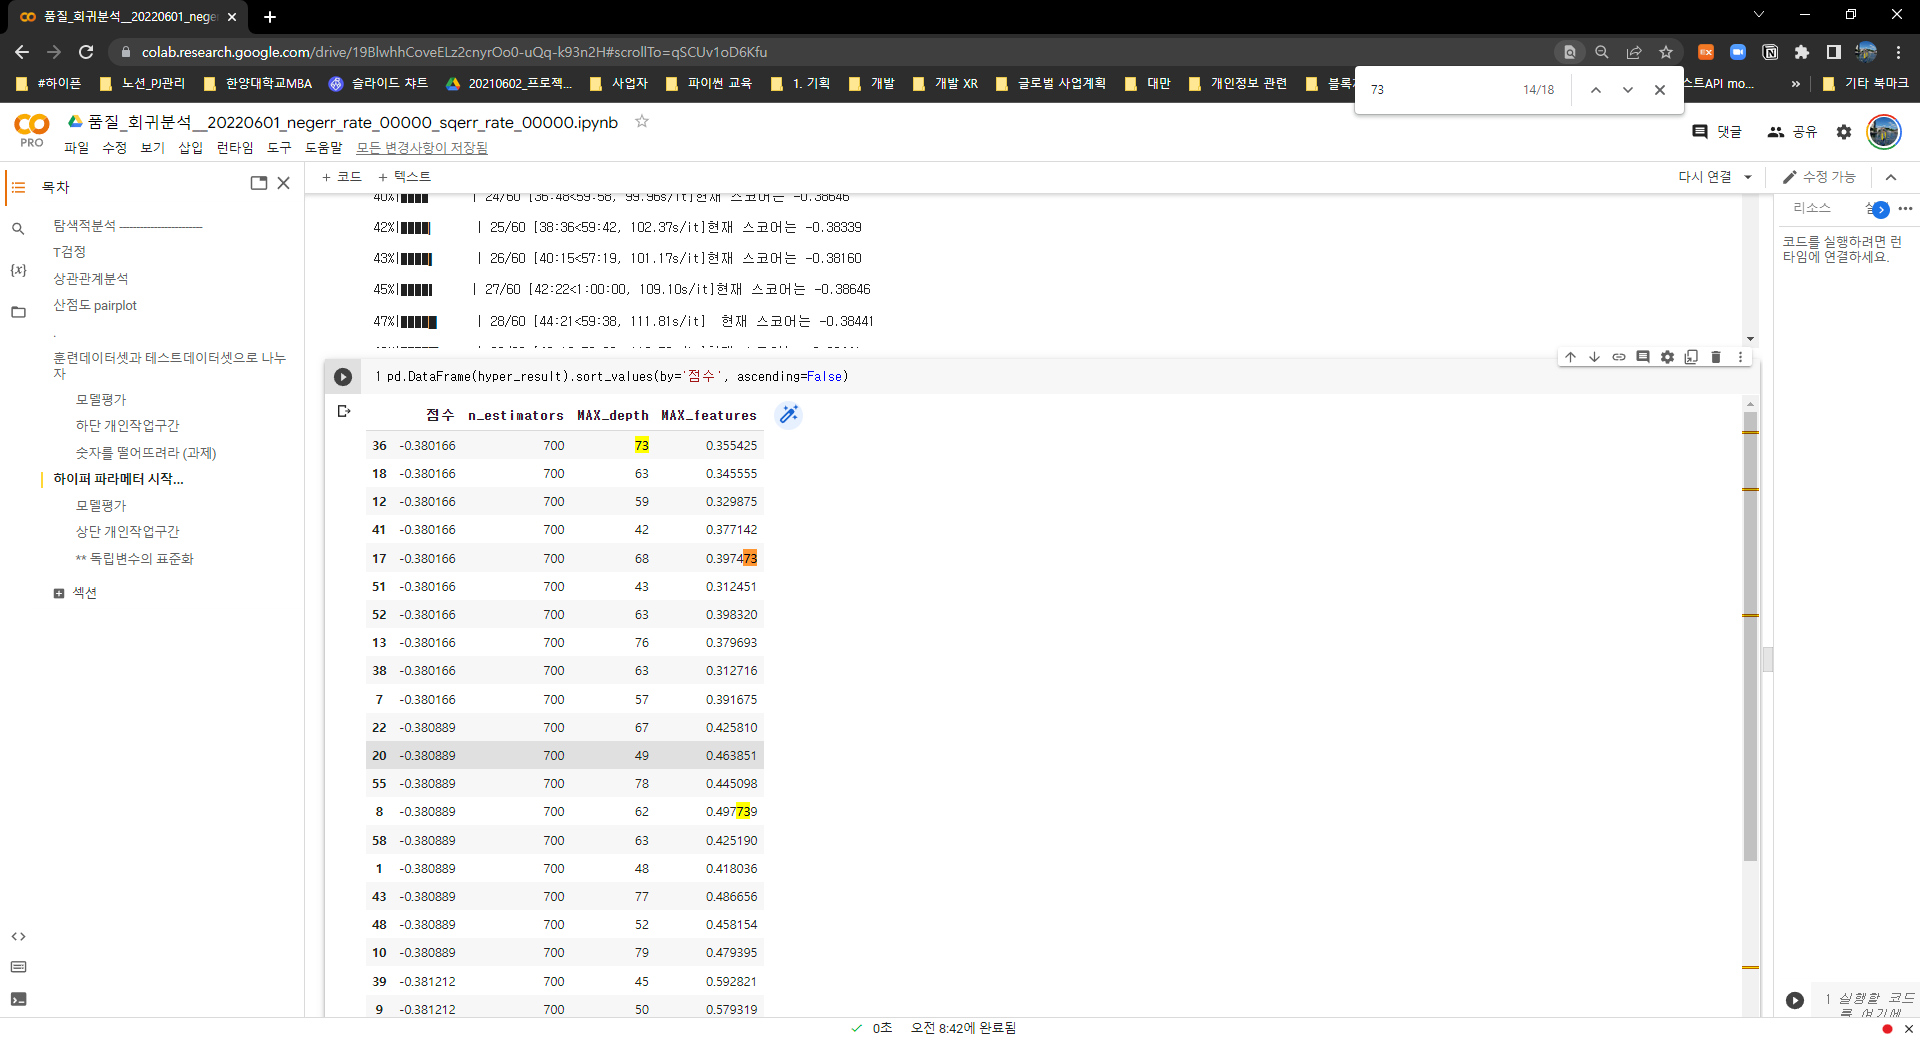

In [ ]:
# hyper_result2 =[]

# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(60):
#     a = np.random.randint(4,70)
#     b = np.random.uniform(0.3,1.0)
#     model2 = RandomForestRegressor(n_estimators = 300,                         # 100~1000
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=2,
#                                   min_samples_leaf=1,
#                                   random_state=31)

#     score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

#     hyper_result2.append({'점수' : score,
#                          '피쳐모델' : "basic",
#                          'MAX_depth': a,
#                          'MAX_features': b})
              

#     print("현재 스코어는 {0:.5f}".format(score))


In [ ]:
# pd.DataFrame(hyper_result2).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_B =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

#     score_B = cross_val_score(model_B, X_B_train, y_B_train, scoring= 'neg_mean_squared_error', cv=25).mean()

#     hyper_result_B.append({'점수' : score_B,
#                            '피쳐모델' : "B",
#                            'MAX_depth': a,
#                            'MAX_features': b})
              

#     print("현재 스코어는 {0:.5f}".format(score_B))


In [ ]:
# pd.DataFrame(hyper_result_B).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_C =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_C = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)
        
#     score_C = cross_val_score(model_C, X_C_train, y_C_train, scoring= 'neg_mean_squared_error', cv=25).mean()

#     hyper_result_C.append({'점수' : score_C,
#                            '피쳐모델' : "C",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_C))


In [ ]:
# pd.DataFrame(hyper_result_C).sort_values(by='점수', ascending=False) 


In [ ]:
# hyper_result_D =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_D = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_D = cross_val_score(model_D, X_D_train, y_D_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_D.append({'점수' : score_D,
#                            '피쳐모델' : "D",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_D))


In [ ]:
# pd.DataFrame(hyper_result_D).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_E =[]

# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_E = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_E = cross_val_score(model_E, X_E_train, y_E_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_E.append({'점수' : score_E,
#                            '피쳐모델' : "E",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_E))


In [ ]:
# pd.DataFrame(hyper_result_E).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_F =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_F = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_F = cross_val_score(model_F, X_F_train, y_F_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_F.append({'점수' : score_F,
#                            '피쳐모델' : "F",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_F))


In [ ]:
# pd.DataFrame(hyper_result_F).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_G =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_G = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_G = cross_val_score(model_G, X_G_train, y_G_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_G.append({'점수' : score_G,
#                            '피쳐모델' : "G",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_G))


In [ ]:
# pd.DataFrame(hyper_result_G).sort_values(by='점수', ascending=False) 

In [ ]:
print("최소에러율")
print(pd.DataFrame(hyper_result)['점수'].max())
# print(pd.DataFrame(hyper_result2)['점수'].max())
# print(pd.DataFrame(hyper_result_B)['점수'].max())
# print(pd.DataFrame(hyper_result_C)['점수'].max())
# print(pd.DataFrame(hyper_result_D)['점수'].max())
# print(pd.DataFrame(hyper_result_E)['점수'].max())
# print(pd.DataFrame(hyper_result_F)['점수'].max())
# print(pd.DataFrame(hyper_result_G)['점수'].max())
# print(pd.DataFrame(hyper_result_H)['점수'].max())
# print(pd.DataFrame(hyper_result_H2)['점수'].max())
# print(pd.DataFrame(hyper_result_Z)['점수'].max())
# print(pd.DataFrame(hyper_result_Z2)['점수'].max())

print(" ")
print("평균에러율")
print(pd.DataFrame(hyper_result)['점수'].mean())
# print(pd.DataFrame(hyper_result2)['점수'].mean())
# print(pd.DataFrame(hyper_result_B)['점수'].mean())
# print(pd.DataFrame(hyper_result_C)['점수'].mean())
# print(pd.DataFrame(hyper_result_D)['점수'].mean())
# print(pd.DataFrame(hyper_result_E)['점수'].mean())
# print(pd.DataFrame(hyper_result_F)['점수'].mean())
# print(pd.DataFrame(hyper_result_G)['점수'].mean())
# print(pd.DataFrame(hyper_result_H)['점수'].mean())
# print(pd.DataFrame(hyper_result_H2)['점수'].mean())
# print(pd.DataFrame(hyper_result_Z)['점수'].mean())
# print(pd.DataFrame(hyper_result_Z2)['점수'].mean())

최소에러율
-0.3716169299693718
 
평균에러율
-0.3750021081976884


In [ ]:
# 최종 모델정의

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Finalmodel = RandomForestRegressor()
# Finalmodel2 = RandomForestRegressor()
# Finalmodel_B = RandomForestRegressor()
# Finalmodel_C = RandomForestRegressor()
# Finalmodel_D = RandomForestRegressor()
# Finalmodel_E = RandomForestRegressor()
# Finalmodel_F = RandomForestRegressor()
# Finalmodel_G = RandomForestRegressor()
# Finalmodel_H = RandomForestRegressor()
# Finalmodel_H2 = RandomForestRegressor()
# Finalmodel_Z = RandomForestRegressor()
# Finalmodel_Z2 = RandomForestRegressor()

In [ ]:
Finalmodel.fit(X_train, y_train)
# Finalmodel2.fit(X_train, y_train)
# Finalmodel_B.fit(X_B_train, y_B_train)
# Finalmodel_C.fit(X_C_train, y_C_train)
# Finalmodel_D.fit(X_D_train, y_D_train)
# Finalmodel_E.fit(X_E_train, y_E_train)
# Finalmodel_F.fit(X_F_train, y_F_train)
# Finalmodel_G.fit(X_G_train, y_G_train)
# Finalmodel_H.fit(X_H_train, y_H_train)
# Finalmodel_H2.fit(X_H_train, y_H_train)
# Finalmodel_Z.fit(X_Z_train, y_Z_train)
# Finalmodel_Z2.fit(X_Z_train, y_Z_train)

RandomForestRegressor()

In [ ]:
prediction = Finalmodel.predict(X_test)

In [ ]:
# prediction2 = Finalmodel2.predict(X_test)


In [ ]:
# prediction_B = Finalmodel_B.predict(X_B_test)
# prediction_C = Finalmodel_C.predict(X_C_test)
# prediction_D = Finalmodel_D.predict(X_D_test)
# prediction_E = Finalmodel_E.predict(X_E_test)
# prediction_F = Finalmodel_F.predict(X_F_test)
# prediction_G = Finalmodel_G.predict(X_G_test)
# prediction_H = Finalmodel_H.predict(X_H_test)
# prediction_H2 = Finalmodel_H2.predict(X_H_test)
# prediction_Z = Finalmodel_Z.predict(X_Z_test)
# prediction_Z2 = Finalmodel_Z2.predict(X_Z_test)

In [ ]:
prediction

array([5.98, 5.47, 6.94, ..., 5.71, 6.43, 5.38])

In [ ]:
# prediction2

In [ ]:
# prediction_B

In [ ]:
# prediction_C

In [ ]:
# prediction_D

In [ ]:
# prediction_E

In [ ]:
# prediction_F

In [ ]:
# prediction_G

In [ ]:
# prediction_H

In [ ]:
# prediction_H2

In [ ]:
# prediction_Z

In [ ]:
# prediction_Z2

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.3552691538461539

In [ ]:
# metrics.mean_squared_error(y_test, prediction2)                 #  오류율이 낮아야 좋은 모델    

In [ ]:
# metrics.mean_squared_error(y_B_test, prediction_B)   

In [ ]:
# metrics.mean_squared_error(y_C_test, prediction_C) 

In [ ]:
# metrics.mean_squared_error(y_D_test, prediction_D) 

In [ ]:
# metrics.mean_squared_error(y_E_test, prediction_E) 

In [ ]:
# metrics.mean_squared_error(y_F_test, prediction_F) 

In [ ]:
# metrics.mean_squared_error(y_G_test, prediction_G) 

In [ ]:
# metrics.mean_squared_error(y_H_test, prediction_H)          

In [ ]:
# metrics.mean_squared_error(y_H_test, prediction_H2)          

In [ ]:
# metrics.mean_squared_error(y_Z_test, prediction_Z)

In [ ]:
# metrics.mean_squared_error(y_Z2_test, prediction_Z2)

### 상단 개인작업구간

In [ ]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [ ]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [ ]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:

#  증명력을 추가적으로 확인해보아야 함


In [ ]:
# formula_20220530 = 'quality ~  volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외 fixed_acidity + pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외  pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity +  chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +   alcohol + type'
# # 임시제외  residual_sugar + pH + sulphates +
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + alcohol + type + residual_sugar + pH + sulphates'
# 추가  citric_acid
# #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_model = ols(formula, data=wine).fit()          #

In [ ]:
# formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

density  -33에 대한 확인
wine.head()
0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [ ]:
# formula_model = ols(formula, data=wine_standard).fit()

In [ ]:
# formula_model.summary()

In [ ]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [ ]:
formula_all_model.summary()

In [ ]:
formula_20220530_result = ols(formula_20220530, data=wine_standard).fit()

In [ ]:
formula_20220530_result.summary()              #citric_acid

In [ ]:
# citric_acid   을  fomula에 추가한 경우  R-squared:0.296 -> 0.297    증가됨을 확인 